In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [10]:
homicide_data = pd.read_csv('data/homicide-data.csv', encoding='ISO-8859-1')

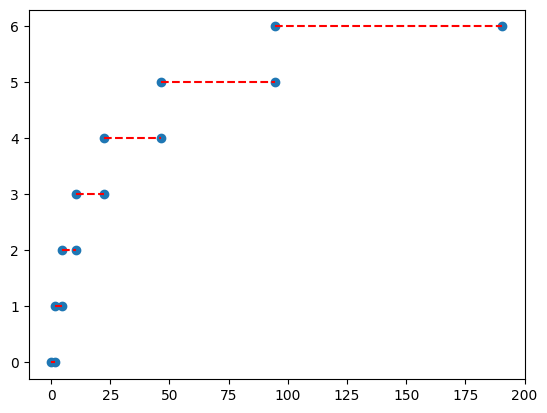

In [21]:
# Постройте лестницу из случайного полученного количества 
# ступенек при помощи ​Scatter Plots, при том, что длина каждой ступени 
# увеличивается в 2 раза по отношению к предыдущей.
# например координаты точек ступенек будут такими:

def steps(n, l=1):
    p = 2 ** np.arange(n+1) - 1
    x = np.vstack((p[:-1], p[1:])).T.ravel()*l
    y = np.repeat(np.arange(n), 2)
    return x, y
x, y = steps(np.random.randint(2, 10), 1.5)

plt.scatter(x, y)

for i in range(1, len(x), 2):
    plt.hlines(y[i], x[i-1], x[i], color='r', linestyles='dashed')


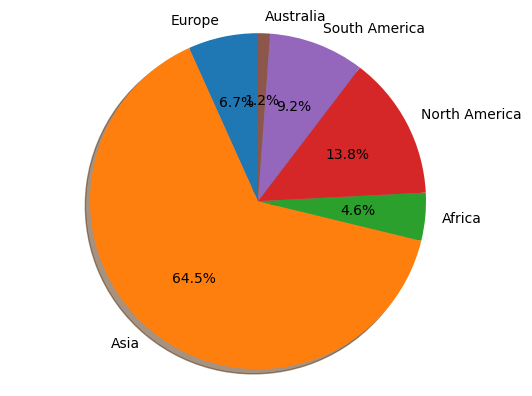

In [22]:
# При помощи Pie Charts создайте график, который отражает 
# континенты планеты и как подгруппы их страны и города
# Данные создать самостоятельно

continents = ['Europe', 'Asia', 'Africa', 'North America', 'South America', 'Australia']
population = [146000000, 1400000000, 100000000, 300000000, 200000000, 25000000]

plt.pie(population, labels=continents, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

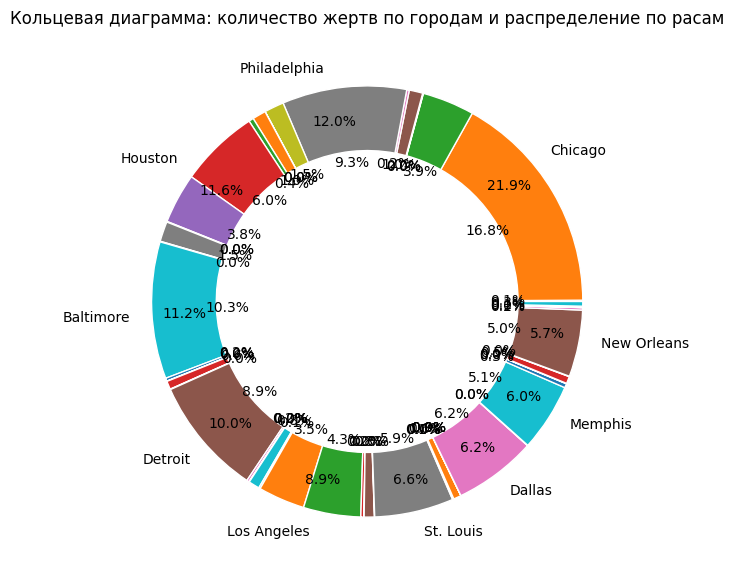

In [23]:
# Тоже самое но с датасетом homicides
# Круговая диаграмма по числу жертв по городам и поддиаграмма по расе
# cols: reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition


# Группировка данных по городам и расам жертв
grouped_city_race = homicide_data.groupby(['city', 'victim_race']).size().unstack(fill_value=0)
top_10_cities = homicide_data['city'].value_counts().head(10).index

# Выбор данных только для топ 10 городов
top_10_grouped = grouped_city_race.loc[top_10_cities]

# Создание графика
fig, ax = plt.subplots(figsize=(10, 7))

# Внешний круг (кольцо - количество жертв по топ 10 городам)
outer_circle = ax.pie(top_10_grouped.sum(axis=1), labels=top_10_grouped.index, autopct='%1.1f%%', pctdistance=0.85, wedgeprops=dict(width=0.3, edgecolor='w'))

# Внутренний круг (кольцо - распределение расы жертв в каждом городе)
inner_circle = ax.pie(top_10_grouped.values.flatten(), autopct='%1.1f%%', pctdistance=0.65, wedgeprops=dict(width=0.3, edgecolor='w'))

# Добавление заголовка
ax.set_title('Кольцевая диаграмма: количество жертв по городам и распределение по расам')

plt.show()

In [1]:
# Покажите ​зависимость между ростом, весом и возрастом 
# ваших друзей с помощью Bubble plot и Box plot
# Данные создать самостоятельно
n = 10
height = np.random.randint(150, 210, n)
weight = np.random.randint(50, 120, n)
age = np.random.randint(18, 40, n)

plt.scatter(height, weight, s=age*10, alpha=0.5)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

plt.boxplot([height, weight, age], labels=['Height', 'Weight', 'Age'])
plt.show()



NameError: name 'np' is not defined

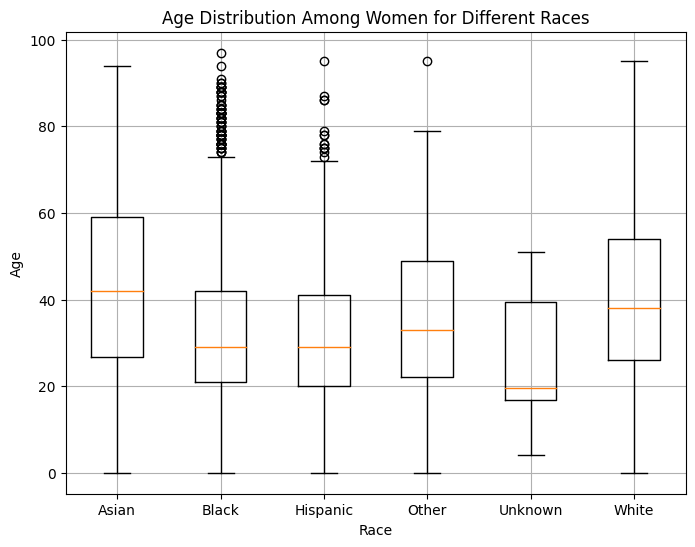

In [ ]:
# Боксплот распределения по возрастам среди женщин для разных рас
homicide_data = homicide_data[homicide_data['victim_age'] != 'Unknown']
homicide_data['victim_age'] = homicide_data['victim_age'].astype(int)
female_victims = homicide_data[homicide_data['victim_sex'] == 'Female']

women_race_data = {}
for race, race_data in female_victims.groupby('victim_race')['victim_age']:
    women_race_data[race] = race_data

plt.figure(figsize=(8, 6))
plt.boxplot(women_race_data.values(), labels=women_race_data.keys())
plt.title('Age Distribution Among Women for Different Races')
plt.xlabel('Race')
plt.ylabel('Age')
plt.grid(True)
plt.show()